In [6]:
%load_ext autoreload
%autoreload 2
import json
from scipy import sparse
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import json

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Read the dataset with Pandas

In [14]:
dataset = pd.read_json("../data/rcv1_news.json", lines=True)
dataset.shape[0]

804414

In [15]:
print(type(dataset))
dataset

<class 'pandas.core.frame.DataFrame'>


,categories,content,date,headline,id,lang,title
0,"[E11, ECAT, M11, M12, MCAT]",Emerging evidence that Mexico's economy was ba...,1996-08-20,Recovery excitement brings Mexican markets to ...,2286,en,MEXICO: Recovery excitement brings Mexican mar...
1,"[C24, CCAT]",Chrysler Corp. Tuesday announced $380 million ...,1996-08-20,Chrysler plans new investments in Latin America.,2287,en,USA: Chrysler plans new investments in Latin A...
2,"[C15, C151, CCAT, E41, ECAT, GCAT, GJOB]",CompuServe Corp. Tuesday reported a surprising...,1996-08-20,"CompuServe reports loss, cutting work force.",2288,en,"USA: CompuServe reports loss, cutting work force."
3,"[C15, C151, CCAT]",CompuServe Corp. Tuesday reported a surprising...,1996-08-20,"CompuServe reports loss, cutting work force.",2289,en,"USA: CompuServe reports loss, cutting work force."
4,"[C11, C22, CCAT]",If dining at Planet Hollywood made you feel li...,1996-08-20,Planet Hollywood launches credit card.,2290,en,USA: Planet Hollywood launches credit card.
5,"[M14, MCAT]",Hog prices fell Tuesday after government slaug...,1996-08-20,"Hog prices tumble as supplies increase, cocoa ...",2291,en,"USA: Hog prices tumble as supplies increase, c..."
6,"[M11, M12, M13, M132, M14, MCAT]",Blue-chip stocks rallied Tuesday after the Fed...,1996-08-20,Blue chips end up as Fed keeps interest rates ...,2292,en,USA: Blue chips end up as Fed keeps interest r...
7,"[C22, CCAT]",Sprint Corp. Tuesday announced plans to offer ...,1996-08-20,Sprint to offer consumer Internet access service.,2293,en,USA: Sprint to offer consumer Internet access ...
8,"[E14, ECAT]",Shoppers are loading up this year on perennial...,1996-08-20,Back-to-school spending is up.,2294,en,USA: Back-to-school spending is up.
9,"[C12, CCAT, GCAT, GCRIM]",Kansas and Arizona filed lawsuits against some...,1996-08-20,"Kansas, Arizona add to suits against tobacco f...",2295,en,"USA: Kansas, Arizona add to suits against toba..."


## LOAD all 4 files with QIDs : RCV1-sample-10000-A.txt, B, C, D

In [16]:
def loadJSON(sampleFilename):
    with open(sampleFilename) as json_data:
        sample_10000 = json.load(json_data)
    return sample_10000

In [17]:
all_test_query_ids = []
for qt in ["A","B","C","D"]:
    filename ="../data/RCV1-sample-10000-"+qt+".txt"
    qid_list = loadJSON(filename)
    all_test_query_ids.extend(qid_list)

In [18]:
print(len(all_test_query_ids))
print(dataset.shape)

40000
(804414, 7)


## Create new dataset without the 40.000 
TODO: the same for SIGNAL

In [30]:
# new_dataset = dataset.drop(dataset.index[all_test_query_ids])
# print(new_dataset.shape)  # you can see index 7 is not in the new dataframe
# dataset = new_dataset # rename new dataset with "dataset"
print(dataset.shape)

(764414, 7)


# 2. Tokeninzing, computing IDF and TFIDF term-document matrix

In [31]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_vectorizer = TfidfVectorizer(min_df=2, norm=None, stop_words='english') 
t0 = time()
rcv1_features_idf = tfidf_vectorizer.fit(dataset["content"])
print("FIT done in %0.3fs." % (time() - t0))

FIT done in 213.460s.


In [32]:
rcv1_tfidf_matrix = tfidf_vectorizer.transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 439.501s.


In [33]:
idf_vectorizer = TfidfVectorizer(min_df=2, binary=True, norm=None, stop_words='english')
t0 = time()
rcv1_idf_matrix = idf_vectorizer.fit_transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 222.413s.


In [34]:
# %store rcv1_features_idf
# %store rcv1_tfidf_matrix
# %store rcv1_idf_matrix

# 3. Terms and IDF

In [35]:
print("Number of terms in dictionary:", len(rcv1_features_idf.idf_))
print()

top10IDFTerm_idx = rcv1_features_idf.idf_.argsort()[::-1][:100]
print(top10IDFTerm_idx)
print(rcv1_features_idf.idf_[top10IDFTerm_idx])

Number of terms in dictionary: 247599

[ 85661  96545  96563  96555  96554 192999 193000 193002  96544  96444
  96541  96539  96538  96536 193010  96533 192989  96564 192987  96572
  96576  96582 192975  96589  96591  96593  96601 192964  96607 192962
  96615 192959 192958  96531  96529 193015  96487 193064  96456  96457
 193055 193053 193052  96468  96471  96476  96479 193044 193043 193042
  96485 193038  96527  96490  96492 193035  96494  96495   8274  96499
  96506  96513  96514  96515  96516 193022  96523 192956 192954 192952
  96776  96741  96747  96753 192873 192872 192871  96767  96768  96769
 192867 192866  96770 192863 192862  96778  96734   8261  96781 192855
  96788 192853  96790 192851  96791  96793  96795 192843   3005 192839]
[ 13.44825383  13.44825383  13.44825383  13.44825383  13.44825383
  13.44825383  13.44825383  13.44825383  13.44825383  13.44825383
  13.44825383  13.44825383  13.44825383  13.44825383  13.44825383
  13.44825383  13.44825383  13.44825383  13.44825383

In [36]:
inv_vocab = {v: k for k, v in rcv1_features_idf.vocabulary_.items()}
for term_id in top10IDFTerm_idx[:10]:
    print(inv_vocab[term_id], rcv1_features_idf.idf_[term_id])

etruscans 13.4482538257
garralda 13.4482538257
garrington 13.4482538257
garri 13.4482538257
garrettt 13.4482538257
rosenlew 13.4482538257
rosenschein 13.4482538257
rosensteele 13.4482538257
garraghty 13.4482538257
garfias 13.4482538257


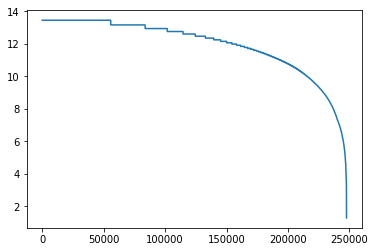

In [37]:
plt.plot(sorted(rcv1_features_idf.idf_, reverse=True))
plt.show()

# 4. Top 10 IDF terms and their TFIDF

In [38]:
for i in range(rcv1_idf_matrix.shape[0]):
    if i==10:
        break
#     print(dataset["title"].iloc[i])
#     print(dataset["content"].iloc[i])
    idf_row = rcv1_idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = rcv1_tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
#     print(row.data) # give only nonzero values so the array is much less than 659255, e.g. 30
#     print(row.indices) # gives the actual indices of the non zero terms
    
    print("-----------------")
    print("Document: ",i)
    print()
    
    print("Top 10 Highest IDF")
    print(top10Terms_idf_idx)
    print([inv_vocab[term_id] for term_id in idf_row.indices[top10Terms_idf_idx]])
    print(idf_row.indices[top10Terms_idf_idx])
    print("IDF values: ",idf_row.data[top10Terms_idf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_idf_idx])
    print()
    
    print("Top 10 Highest TFIDF")
    print(top10Terms_tfidf_idx)
    print([inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]])
    print(tfidf_row.indices[top10Terms_tfidf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_tfidf_idx])
    print("IDF values: ", idf_row.data[top10Terms_tfidf_idx])
    print()

-----------------
Document:  0

Top 10 Highest IDF
[126 142  30  39  60  91 164 159  86   9]
['schonander', 'boni', 'hickman', 'etched', 'governent', 'confounding', 'vengeance', 'hype', 'frenzied', 'buzz']
[198733  45949 108275  85518 100863  62959 234960 112026  94268  50688]
IDF values:  [ 11.65649436  11.05035855  10.76267648  10.31275961  10.11604932
   9.85551823   9.4716923    9.00168867   8.89437693   8.75080836]
TFIDF values:  [  7.88234507   4.65778179  11.79308322   5.76915652   8.42876892
   3.55984607   3.75637247   3.66857367   7.04467963   5.82054716]

Top 10 Highest TFIDF
[ 69  48 149  58 106 144  46  11  30  32]
['mexico', 'rates', 'boni', 'peso', 'fundamentals', 'cetes', 'recovery', 'tuesday', 'secondary', 'schonander']
[148052 185177  45949 172745  95156  55352 186665 228247 199935 198733]
TFIDF values:  [ 34.05691026  24.6112112   22.10071711  18.14167825  17.33300953
  15.35570333  14.89075148  12.92985881  11.79308322  11.65649436]
IDF values:  [  5.2628107    3.09

# 5. Position of High terms in Docs

In [39]:
# do some regression to find alpha for each (buckets with freqs?)

# as described here: https://www.nltk.org/_modules/nltk/tokenize.html
# the default analyzer used in scikit is called "word": 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

def find_positions_term(term, token_text):
    pos = [k for k,v in enumerate(token_text) if v==term]
    return pos

def find_positions_termlist(terms, token_text):
    term_set = set(terms)
    pos = [k for k,v in enumerate(token_text) if v in term_set]
    return pos

In [40]:
analyzer = tfidf_vectorizer.build_analyzer()

In [41]:
def getDistributionForRows(row_idxs, matrix, dataset, num_passage=10, n_terms=5):
    cum_sum = np.zeros(num_passage)
    #for i in progress_bar.iter_progress(row_idxs):
    for i in row_idxs:

        row = matrix.getrow(i) # this is a 1 x 659255 csr matrix
        top10Terms_idx = row.data.argsort()[::-1][:10]

        # find the positions of high idf/tfidf terms in the text
        top_10_terms = [inv_vocab[term_id] for term_id in row.indices[top10Terms_idx]]

        # inside the document
        all_text = dataset["content"].iloc[i]
        token_text = analyzer(all_text.lower())

        all_pos = find_positions_termlist(top_10_terms[:n_terms], token_text)
        all_pos.append(len(token_text))
        n,_ = np.histogram(all_pos, bins=num_passage, density=False, weights=np.ones(len(all_pos)) / len(all_pos))
        cum_sum += n

    return cum_sum/len(row_idxs) 

## 5.1. IDF

forth decimal differences! camon

In [42]:
# Default: 10 passages
# Number of terms to be considered: 5 
getDistributionForRows(range(rcv1_idf_matrix.shape[0]), rcv1_idf_matrix, dataset)

array([ 0.21337203,  0.0715915 ,  0.07166731,  0.06987542,  0.06972933,
        0.07281801,  0.07157474,  0.07123328,  0.07396937,  0.21416901])

In [43]:
# Default: 10 passages
# Number of terms to be considered: 10 
getDistributionForRows(range(rcv1_idf_matrix.shape[0]), rcv1_idf_matrix, dataset, n_terms=10)

array([ 0.15253624,  0.08136122,  0.08314798,  0.08310229,  0.08365032,
        0.08774324,  0.08693091,  0.08616558,  0.08898091,  0.16638132])

In [44]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

## 5.2. TFDIF

In [45]:
# 10 passages on top 5 terms in the text
getDistributionForRows(range(rcv1_tfidf_matrix.shape[0]), rcv1_tfidf_matrix, dataset)

array([ 0.14775657,  0.09114831,  0.0929076 ,  0.09186909,  0.09163097,
        0.09497293,  0.09353664,  0.09073851,  0.08582868,  0.11961069])

In [46]:
# 10 passages on top 10 terms in the text
getDistributionForRows(range(rcv1_tfidf_matrix.shape[0]), rcv1_tfidf_matrix, dataset, n_terms=10)

array([ 0.12855066,  0.09463955,  0.09584048,  0.09529599,  0.09524029,
        0.09910403,  0.09793045,  0.09554491,  0.09196121,  0.10589243])

In [ ]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)